__Работу делали:__ Молчанова Анна, Попов Илья, Маркова Александра

# 1) ВВЕДЕНИЕ

__Источник данных:__ https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import io
#pd.options.display.float_format ='{:,.2f}'.format

In [77]:
df = pd.read_csv('marketing_campaign.csv')
df.sort_values(by='ID')
df = df[:1000] # всего в датасете 2216 наблюдений, но чтобы работа соответствовала требованиям 
               # мы взяли только 1000 рандомных наблюдей
print('Наш датасет:')
df.head()

Наш датасет:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,MntTotal,Income_norm,MntWines_norm,MntFruits_norm,MntMeatProducts_norm,MntFishProducts_norm,MntSweetProducts_norm,MntGoldProds_norm,exp_group
0,5524,1957,Graduation,Single,58138,0,0,9/4/12,58,635,...,1,1617,35.954236,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,0
1,4855,1974,PhD,Together,30351,1,0,6/6/13,19,14,...,1,46,659.804348,0.304348,0.000000,0.521739,0.065217,0.065217,0.043478,0
2,2114,1946,PhD,Single,82800,0,0,11/24/12,23,1006,...,1,1315,62.965779,0.765019,0.016730,0.087452,0.044867,0.051711,0.034221,1
3,7373,1952,PhD,Divorced,46610,0,2,10/29/12,8,96,...,1,302,154.337748,0.317881,0.039735,0.317881,0.109272,0.072848,0.142384,0
4,2968,1943,PhD,Divorced,48948,0,0,2/1/13,53,437,...,1,902,54.266075,0.484479,0.008869,0.228381,0.177384,0.054324,0.046563,1


In [78]:
print('Переменные датасета:', df.columns.to_list())

Переменные датасета: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'MntTotal', 'Income_norm', 'MntWines_norm', 'MntFruits_norm', 'MntMeatProducts_norm', 'MntFishProducts_norm', 'MntSweetProducts_norm', 'MntGoldProds_norm', 'exp_group']


Данные, которые были взяты для исследования предполагали наличие ответа на маркетинговую кампанию фирмы, т.е. предполагалось, что переменная `Response` будет зависимой, а остальные - объясняющими. \
В нашей работе мы решили проверить другую гипотезу, а именно зависимость `Дохода клиентского Д/Х в год` от переменных - `Возраста, Образования, Семейного положения, Наличия детей или подростков в Д/Х, Количества дней с последней покупки и Даты, когда клиент впервые взаимодействовал с компанией`.

In [79]:
df = df[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Dt_Customer']]
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Dt_Customer
0,1957,Graduation,Single,58138,0,0,58,9/4/12
1,1974,PhD,Together,30351,1,0,19,6/6/13
2,1946,PhD,Single,82800,0,0,23,11/24/12
3,1952,PhD,Divorced,46610,0,2,8,10/29/12
4,1943,PhD,Divorced,48948,0,0,53,2/1/13


Актуальность данного исследования состоит в том, что анализ влияния независимых переменных на доход Д/Х позволит лучше понимать на какие параметры стоит ориентироваться при построении маркетинговой компании, если конечной целью является ориентация на клиентов с определенным доходом

Переводим данные по дате последней покупки в числовую переменную, которую способен анализировать наш алгоритм

In [80]:
import datetime
from datetime import datetime as dt
lst = df.Dt_Customer.to_list()
lst_new = []

for i in range(len(lst)):
    k = lst[i].split('/')
    if len(k[0]) == 1:
        k[0] = '0' + k[0]
    if len(k[1]) == 1:
        k[1] = '0' + k[1]
    k[2] = '20' + k[2]
    k = '.'.join(k)
    k =  dt.strptime(k, '%m.%d.%Y').date()
    k = k.toordinal()
    lst_new.append(k)
    
df['Dt_Customer'] = lst_new
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Dt_Customer
0,1957,Graduation,Single,58138,0,0,58,734750
1,1974,PhD,Together,30351,1,0,19,735025
2,1946,PhD,Single,82800,0,0,23,734831
3,1952,PhD,Divorced,46610,0,2,8,734805
4,1943,PhD,Divorced,48948,0,0,53,734900
...,...,...,...,...,...,...,...,...
995,1974,PhD,Single,71466,0,0,86,735328
996,1976,Graduation,Together,36283,1,1,42,735337
997,1970,Graduation,Single,20587,1,0,39,735364
998,1972,Graduation,Married,30467,1,0,8,735311


# 2) Графический анализ

__Графический анализ независимых переменных__

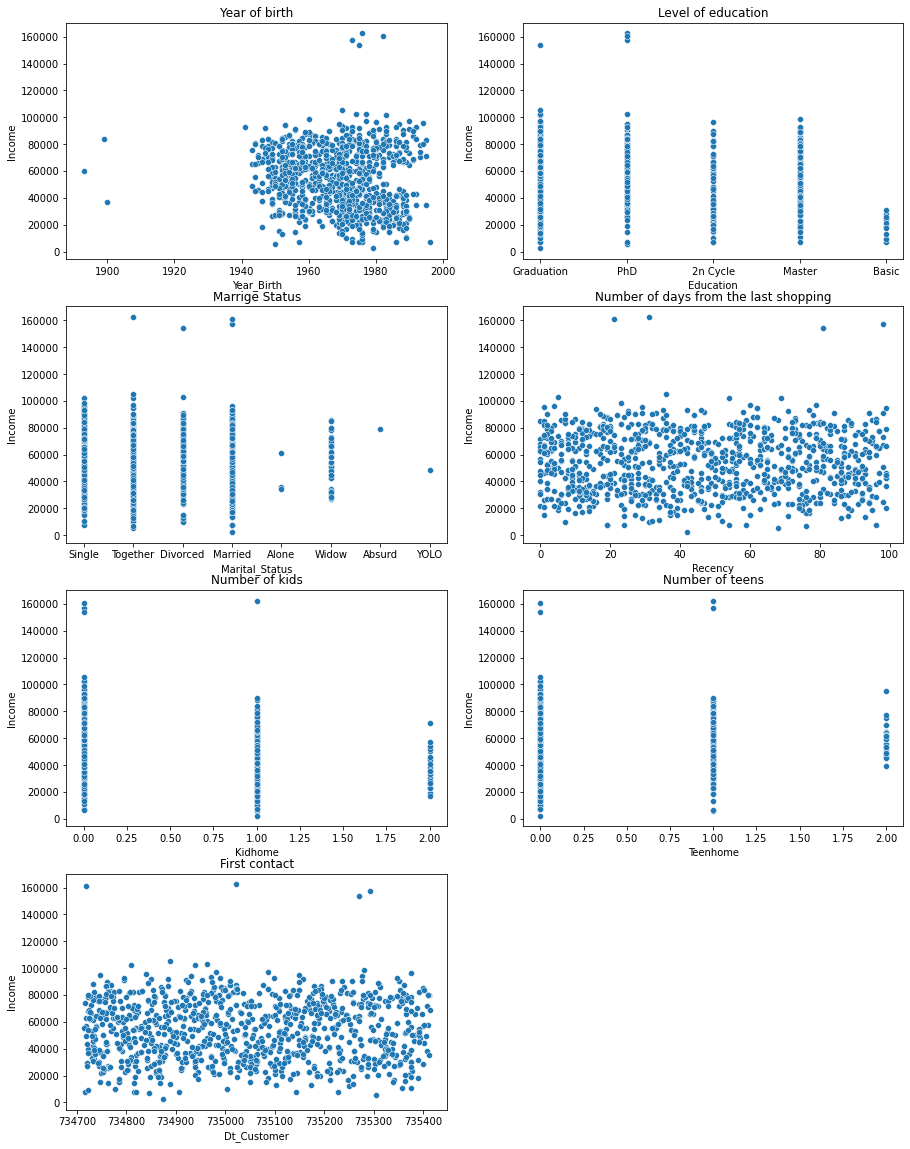

In [81]:
plt.rcParams["figure.figsize"] = [15, 20]
plt.subplot(421)
sns.scatterplot(data=df, x='Year_Birth', y='Income')
plt.title('Year of birth')

plt.subplot(422)
sns.scatterplot(data=df, x='Education', y='Income')
plt.title('Level of education')

plt.subplot(423)
sns.scatterplot(data=df, x='Marital_Status', y='Income')
plt.title('Marrige Status')

plt.subplot(424)
sns.scatterplot(data=df, x='Recency', y='Income')
plt.title('Number of days from the last shopping')

plt.subplot(425)
sns.scatterplot(data=df, x='Kidhome', y='Income')
plt.title('Number of kids')

plt.subplot(426)
sns.scatterplot(data=df, x='Teenhome', y='Income')
plt.title('Number of teens')

plt.subplot(427)
sns.scatterplot(data=df, x='Dt_Customer', y='Income')
plt.title('First contact')

plt.show()

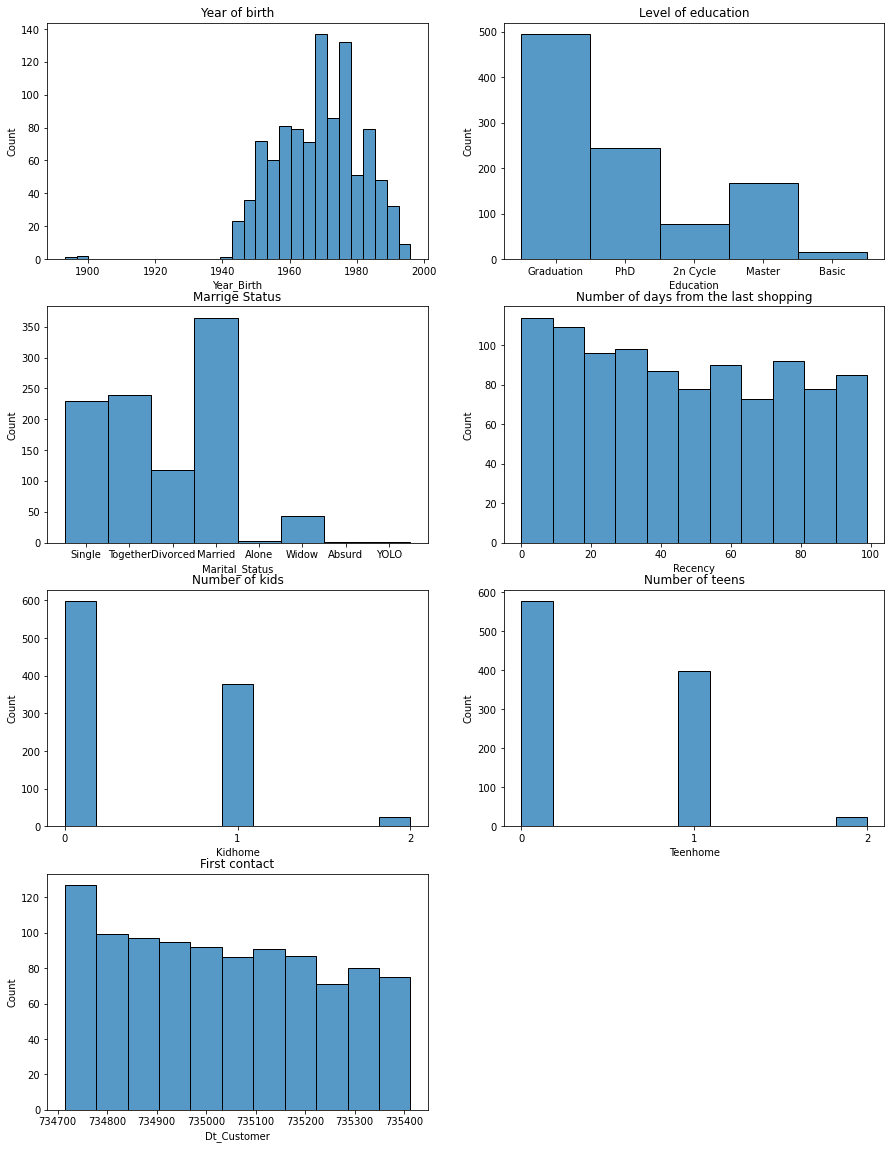

In [82]:
plt.rcParams["figure.figsize"] = [15, 20]
plt.subplot(421)
sns.histplot(df.Year_Birth)
plt.title('Year of birth')

plt.subplot(422)
sns.histplot(df.Education)
plt.title('Level of education')

plt.subplot(423)
sns.histplot(df.Marital_Status)
plt.title('Marrige Status')

plt.subplot(424)
sns.histplot(df.Recency)
plt.title('Number of days from the last shopping')

plt.subplot(425)
sns.histplot(df.Kidhome)
plt.xticks([0, 1, 2])
plt.title('Number of kids')

plt.subplot(426)
sns.histplot(df.Teenhome)
plt.xticks([0, 1, 2])
plt.title('Number of teens')

plt.subplot(427)
sns.histplot(df.Dt_Customer)
plt.title('First contact')

plt.show()

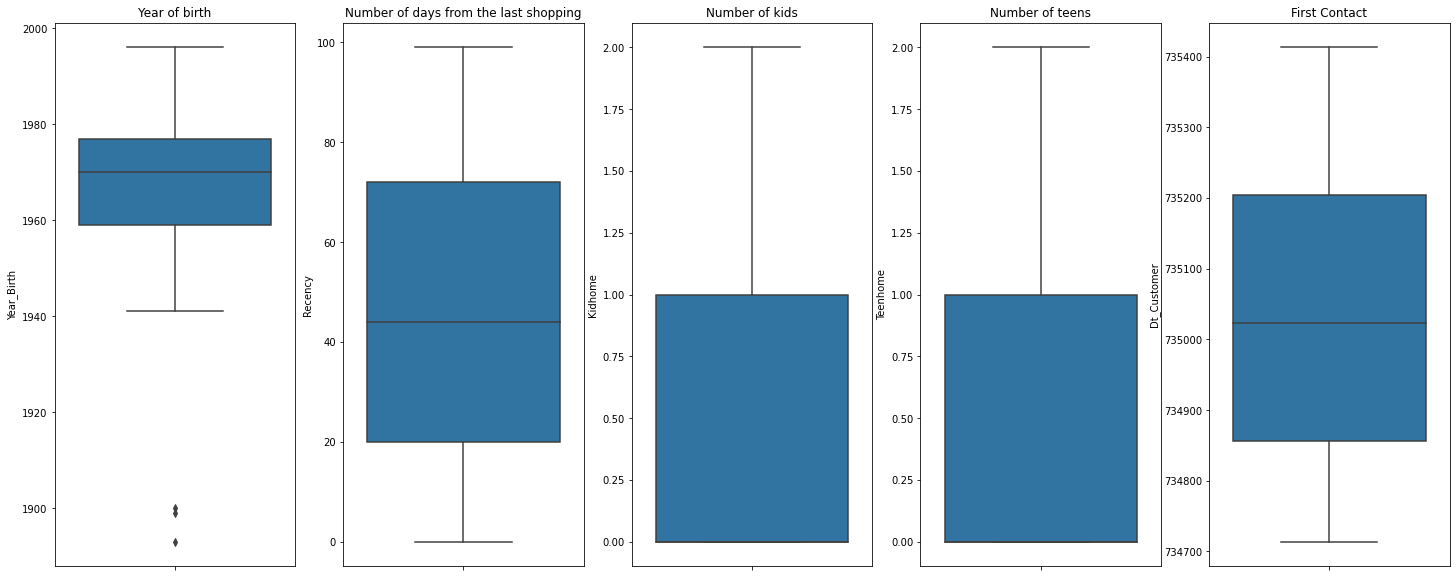

In [83]:
plt.rcParams["figure.figsize"] = [25, 10]
plt.subplot(151)
sns.boxplot(y = df.Year_Birth)
plt.title('Year of birth')

plt.subplot(152)
sns.boxplot(y = df.Recency)
plt.title('Number of days from the last shopping')

plt.subplot(153)
sns.boxplot(y = df.Kidhome)
plt.title('Number of kids')

plt.subplot(154)
sns.boxplot(y = df.Teenhome)
plt.title('Number of teens')

plt.subplot(155)
sns.boxplot(y = df.Dt_Customer)
plt.title('First Contact')

plt.show()

__Выводы графического анализа независимых переменных:__
1) В данных присутствуют выбросы:  
&emsp; &emsp; - Люди, родившиеся до или около 1900 года  
&emsp; &emsp; - Есть достаточно странные значения, например, такие семейные положения как 'absurd' или 'YOLO'  
2) У большинства клиентов нет детей, в то время как максимальное количество детей/подростков в Д/Х клиента равняется 2  
3) Количество новых клиентов уменьшается со временем  
4) Меньше всего клиентов имеют 'Basic' и '2nd Cycle' уровень образования 

__Графический анализ целевой переменной__

Text(0.5, 1.0, 'Income')

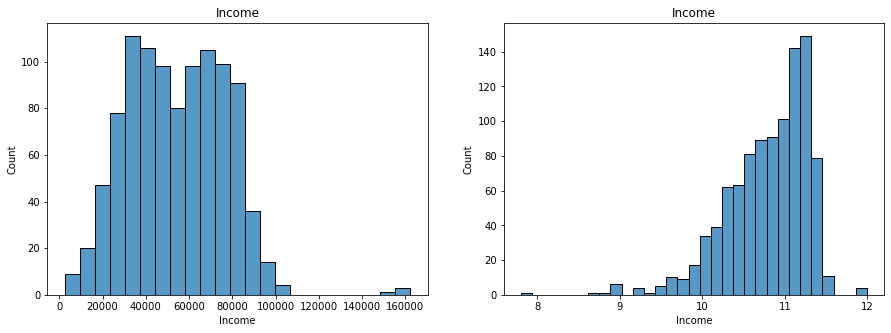

In [84]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.subplot(121)
sns.histplot(df.Income)
plt.title('Income')

plt.subplot(122)
sns.histplot(np.log1p(df.Income))
plt.title('Income')

Text(0.5, 1.0, 'Income')

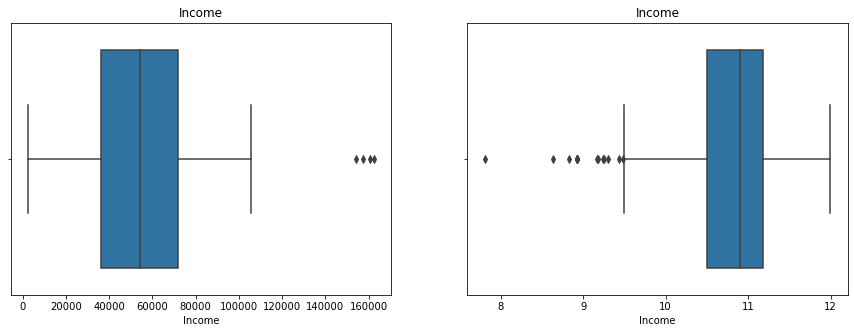

In [85]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.subplot(121)
sns.boxplot(data=df, x=df.Income)
plt.title('Income')

plt.subplot(122)
sns.boxplot(data=df, x=np.log1p(df.Income))
plt.title('Income')

__Вывод графического анализа независимой переменной:__  
У компании есть всего 4 клиента, чей годовой доход составляет более 140 000 денежных единиц. Возможно, эти данные правдивы, тем не менее лучше будет, если мы их посчитаем за выбросы и удалим из датасета, чтобы алгоритм не переобучился (т.е. не подстроился под эти самые 4 наблюдения). 

# 3) Параметризация и спецификация модели

<AxesSubplot:>

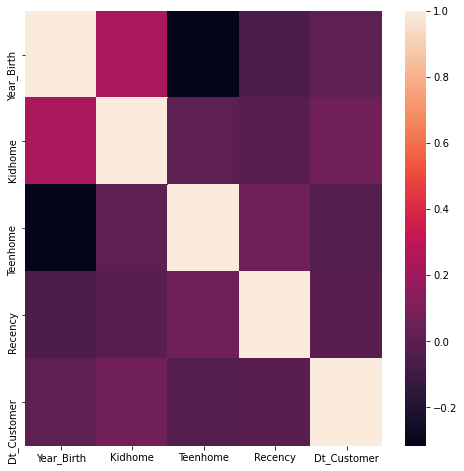

In [86]:
plt.figure(figsize=(8,8))
df_corr = df.drop(columns=['Income'])
sns.heatmap(df_corr.corr())

Анализ ковариационной матрицы независимых переменных говорит нам о том, что данные между собой некоррелированы, что хорошо для нашего исследования поскольку мы не столкнемся с проблемой мультиколлинеарности. Иными словами, каждая переменная вносить свой независимый вклад в значение зависимой.

# 6) Идентификация модели

__Обработка выбросов__  
В данном случае наблюдения, которые мы иденцифицировали как выбросы мы просто удалим

In [87]:
# Удаление выбросов по целевой переменной
IQR_income = np.quantile(df.Income, 0.75) - np.quantile(df.Income, 0.25)
df = df.loc[df.Income <= np.quantile(df.Income, 0.75) + 1.5 * IQR_income]
df.shape

(996, 8)

In [88]:
# Удаление выбросов по переменной года рождения клиента
IQR_age = np.quantile(df.Year_Birth, 0.75) - np.quantile(df.Year_Birth, 0.25)
df = df.loc[df.Year_Birth >= np.quantile(df.Year_Birth, 0.25) - 1.5 * IQR_age]
df.shape

(993, 8)

In [89]:
# Удаление выбросов по переменной семейного положения
# Наблюдения, которые мы не можем иденцифицировать по семейному положению, а именно 'YOLO' и 'Absurd' удаляем
df.drop(df.loc[(df.Marital_Status == 'YOLO') | (df.Marital_Status == 'Absurd')].index, inplace=True)
df.shape

(991, 8)

In [90]:
# Делаем предположение, что наблюдения, которые содержат статусе семейного положения 'Alone' и 'Single' одинаковы
# по содержанию
# Поэтому обозначим все данные переменные как 'Single'
df.loc[(df.Marital_Status == 'Alone'), 'Marital_Status'] = 'Single'

In [91]:
df.reset_index(drop=True, inplace=True)

__Преобразование Kidhome & Teenhome в дамми-переменные (бинарные)__  
Поскольку наличие детей мы предворительно решили брать как дамми-переменные, то мы переобозначим из количества детей в Д/Х клиента в значение наличия/отсутствия детей (1 - ребенок есть в семье клиента, 0 - ребенок отсутсвует)  
Аналогично для подростков в Д/Х клиента

In [92]:
df.loc[(df.Kidhome != 0), 'Kidhome'] = 1
df.loc[(df.Teenhome != 0), 'Teenhome'] = 1

print('Датасет, готовый к анализу:')
df.set_index('Income').reset_index().head()

Датасет, готовый к анализу:


,Income,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,Dt_Customer
0,58138,1957,Graduation,Single,0,0,58,734750
1,30351,1974,PhD,Together,1,0,19,735025
2,82800,1946,PhD,Single,0,0,23,734831
3,46610,1952,PhD,Divorced,0,1,8,734805
4,48948,1943,PhD,Divorced,0,0,53,734900


__Преобразуем год рождения в возраст клиента в квадрате__  
_Возьмем 2015 как год отсчета поскольку последние данные о добвалении клиента в базу есть за 2014 год_

In [93]:
age = (2015 - df['Year_Birth'])**2
df['Age^2'] = age
df.drop(columns = ['Year_Birth'], inplace=True)
df.set_index('Income').reset_index().head()

,Income,Education,Marital_Status,Kidhome,Teenhome,Recency,Dt_Customer,Age^2
0,58138,Graduation,Single,0,0,58,734750,3364
1,30351,PhD,Together,1,0,19,735025,1681
2,82800,PhD,Single,0,0,23,734831,4761
3,46610,PhD,Divorced,0,1,8,734805,3969
4,48948,PhD,Divorced,0,0,53,734900,5184


In [94]:
# Сохраним наш обработанный датасет
#df.to_csv('marketing.csv')

__Целевая переменная:__ `Income` (годовой доход Д/Х клиента)  
__Независимые переменные:__  
&emsp; &emsp; $\cdot$ `Age^2` (возраст клиента в квадрате),  
&emsp; &emsp; $\cdot$ `Marital_Status` (семейное положение),  
&emsp; &emsp; $\cdot$ `Education` (уровень образования),  
&emsp; &emsp; $\cdot$ `Kidhome` (наличие в Д/Х детей),  
&emsp; &emsp; $\cdot$ `Teenhome` (наличие в Д/Х подростков),  
&emsp; &emsp; $\cdot$ `Recency` (количество дней, прощедших с последней покупки),  
&emsp; &emsp; $\cdot$ `Dt_Customer` (день, когда клиент впервые совершил покупку (в числовом выражении))

$$ Income = \beta_0 + \beta_1 \cdot Education + \beta_2 \cdot MaritalStatus + \beta_3 \cdot Kidhome + \beta_4 \cdot Teenhome + \beta_5 \cdot Age^2 + \beta_6 \cdot Recency + \beta_7 \cdot Dt Customer $$

# 7) Построение модели

Мы построим несколько моделей, тем самым проверим несколько гипотез о том как может измениться влияние той или иной переменной в зависимости от того, в каком виде мы ее включим в модель

In [95]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

X = df.drop(columns = ['Income'])
y = df['Income']

__ГИПОТЕЗА:__  
Мы предполагаем, что возраст, наличие в Д/Х детей и подростков, а также уровень образования оказывают значительное влияние на зависимую переменную дохода Д/Х; в то время как влияние остальных переменных на уровень дохода будет незначительным.

In [96]:
categorical = ['Education', 'Marital_Status']
numeric = ['Age^2', 'Kidhome', 'Teenhome', 'Recency', 'Dt_Customer']

X_cat = pd.get_dummies(X[categorical])

scaler = StandardScaler() #нормировка числовых переменных
X_num = scaler.fit_transform(X[numeric])
X_num = pd.DataFrame(X_num, columns = ['Age^2', 'Kidhome', 'Teenhome', 'Recency', 'Dt_Customer'])
X_num.reset_index(drop=True, inplace=True)

X_mod = X_num.join(X_cat)

X_mod = sm.add_constant(X_mod)
model = sm.OLS(y, X_mod).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     52.14
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.69e-102
Time:                        03:36:32   Log-Likelihood:                -11029.
No. Observations:                 991   AIC:                         2.209e+04
Df Residuals:                     977   BIC:                         2.215e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [105]:
categorical = ['Education', 'Marital_Status']
numeric = ['Kidhome']

X_cat = pd.get_dummies(X[categorical])

scaler = StandardScaler() #нормировка числовых переменных
X_num = scaler.fit_transform(X[numeric])
X_num = pd.DataFrame(X_num, columns = ['Kidhome'])
X_num.reset_index(drop=True, inplace=True)

X_mod = X_num.join(X_cat)

X_mod = sm.add_constant(X_mod)
model = sm.OLS(y, X_mod).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     74.70
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          6.44e-105
Time:                        16:11:15   Log-Likelihood:                -11031.
No. Observations:                 991   AIC:                         2.208e+04
Df Residuals:                     981   BIC:                         2.213e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

# 8) Заключение

__ВЫВОДЫ:__  
Гипотеза подтвердилась частично:  
1) Значимые переменные  
&emsp; &emsp; $\cdot$ Наличие детей в Д/Х  
&emsp; &emsp; &emsp; &emsp; $\cdot$ Наилие детей оказывает низкое негативное влияние на уровень дохода Д/Х  
&emsp; &emsp; $\cdot$ Все уровни образования (Basic, Graduation, 2n Cycle, Master, PhD)  
&emsp; &emsp; &emsp; &emsp; $\cdot$ Переменная дохода показывает отрицательную зависимость от уровня образования Basic  
&emsp; &emsp; &emsp; &emsp; $\cdot$ Среди остальных переменных наибольшее положительное влияние на уроень дохода оказыает степень PhD, а наименьшую положительную - 2n Cycle  
&emsp; &emsp; $\cdot$ Семейное положение (кроме Widow)  
2) Незначимые  
&emsp; &emsp; $\cdot$ Наличие подростков в Д/Х  
&emsp; &emsp; $\cdot$ Возраст  
&emsp; &emsp; $\cdot$ Дата последней покупки  
&emsp; &emsp; $\cdot$ Дата, когда клиент впервые сотрудничал с компанией  
&emsp; &emsp; $\cdot$ Статус семейного положения - Widow  
3) R^2 = 0.410, что является малым значением, иными словами - независимые переменные слабо объясняют целевую.  
4) При попытке объяснить зависимую переменную независимыми, которые до этого показали значимость, то мы увидим, что при попытке предсказать доход Д/Х наиболее значимый вклад в предсказание делает наличие детей. Также стоит обратить внимание на то, что значения R-square adjusted незначительно, но ухудшилось.  

---------

В связи со всем вышеперечисленным, можно сделать вывод о том, чтобы иметь лучшее представление о доходах Д/Х необходимо также обратиться к другим переменным, которые возволят наиболее точно спрогнозировать доход. Например, к таким переменным как должность на работе, наличие той или иной собственности и др. 